<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Reducci%C3%B3n_de_dimensionalidad_PCA_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA (Core)**
**Reducción de Dimensionalidad**

**Descripción:**

En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset «Wine Quality» disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

Enlace al dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



**Objetivo:**

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.


**Instrucciones:**

1. Carga de datos:

  – Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.

  – El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

2. Exploración y preprocesamiento de datos:

  – Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.

  – Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

3. Aplicación de PCA:

  – Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.

  – Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

4. Interpretación de los componentes principales:

  – Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.

  – Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

5. Visualización y comparación:

  – Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.

  – Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.



**Análisis de Resultados:**

  – Realiza un análisis detallado sobre cuántos componentes principales son necesarios para capturar una cantidad significativa de variabilidad. Discute la importancia de las variables que más contribuyen a los primeros componentes.
  
  – Explica cómo PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características.



**Conclusión:**

  – Esta actividad tiene como objetivo principal aplicar PCA para la reducción de dimensionalidad en un dataset real. Al reducir la dimensionalidad, PCA facilita la creación de modelos más interpretables y eficientes.

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Valores Nulos:
fixed acidity           0
volatile acidity        0
citric acid             0
re

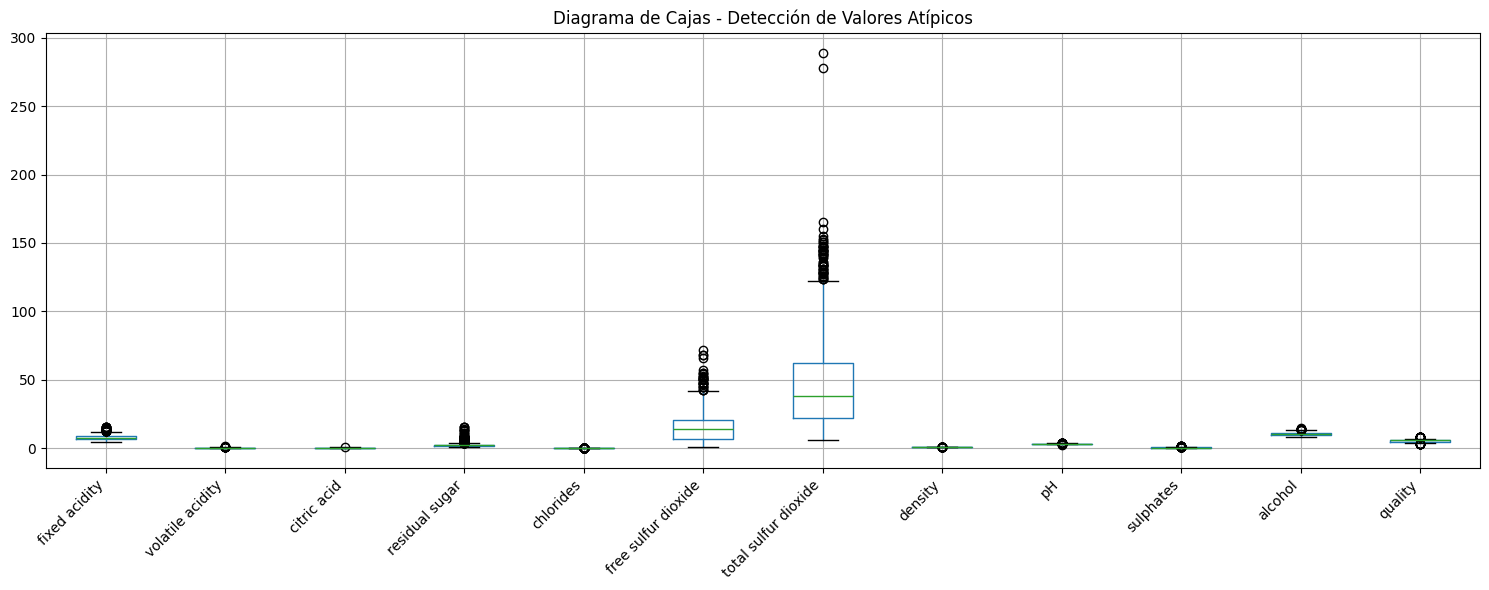

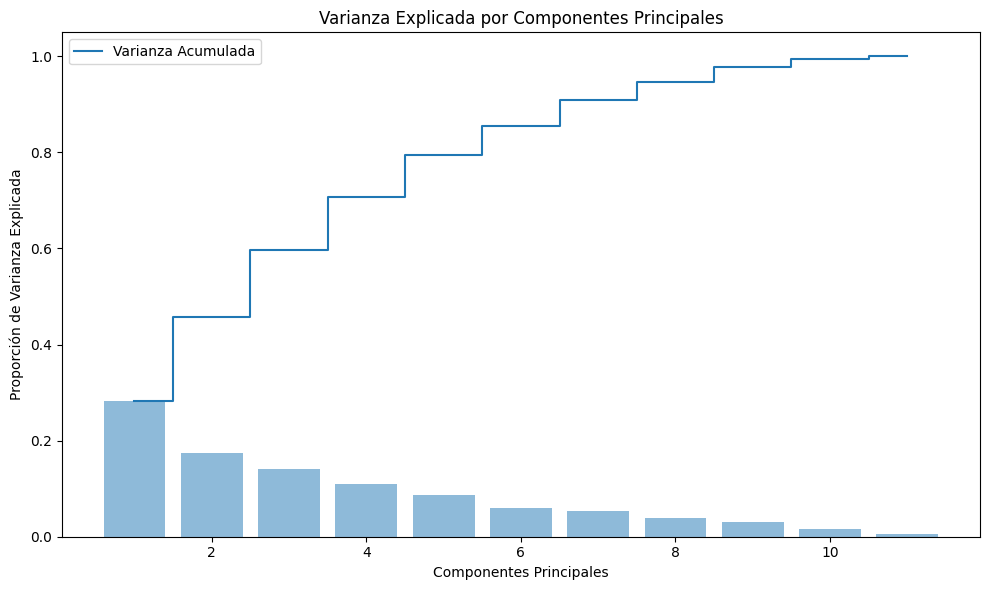


Número de componentes necesarios para explicar el 90% de la varianza: 7

Porcentaje de Varianza Explicada por Componente:
CP1: 28.17%
CP2: 17.51%
CP3: 14.10%
CP4: 11.03%
CP5: 8.72%
CP6: 6.00%
CP7: 5.31%
CP8: 3.85%
CP9: 3.13%
CP10: 1.65%
CP11: 0.54%

Cargas de Componentes (Contribución de Variables):
                           CP1       CP2       CP3       CP4       CP5  \
fixed acidity         0.861676 -0.153401 -0.153584 -0.252995 -0.080940   
volatile acidity     -0.420144  0.381660 -0.560472  0.086999  0.214303   
citric acid           0.816449 -0.210718  0.296760 -0.087504 -0.057386   
residual sugar        0.257293  0.377703  0.126158 -0.410748  0.717312   
chlorides             0.373763  0.205526 -0.115360  0.734022  0.241507   
free sulfur dioxide  -0.063673  0.712936  0.534103 -0.047971 -0.155928   
total sulfur dioxide  0.041515  0.790565  0.401599 -0.038098 -0.217958   
density               0.696211  0.324251 -0.422097 -0.192266  0.153894   
pH                   -0.772227  

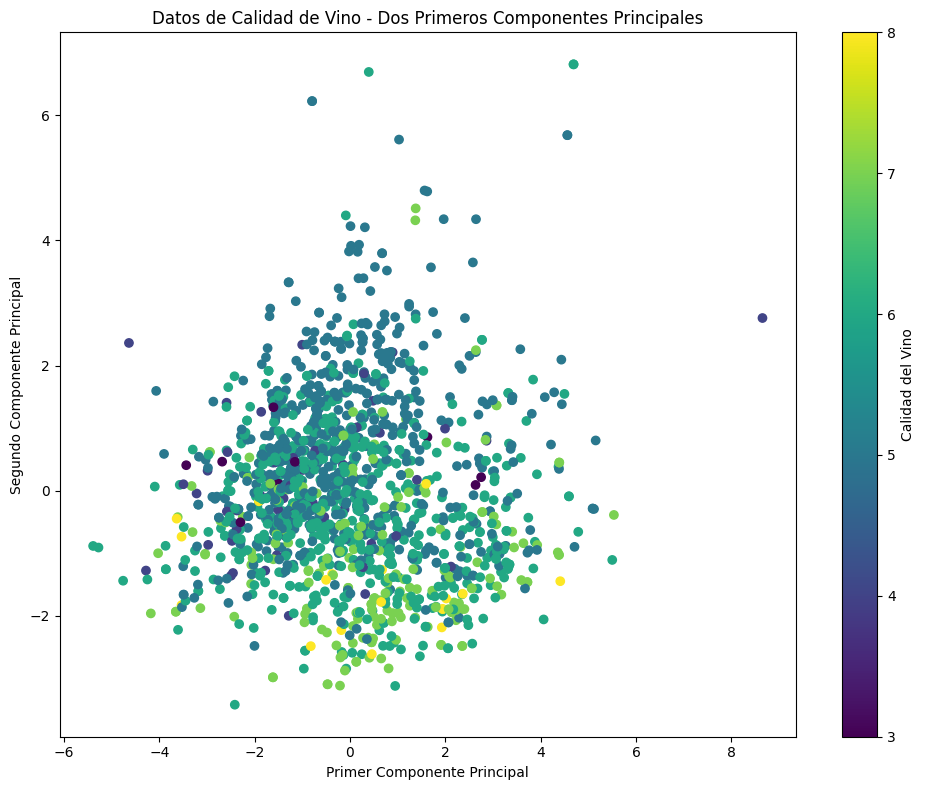

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Paso 1: Carga de datos
# Cargar el dataset desde la ruta especificada
URL = '/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/winequality-red.csv'
df = pd.read_csv(URL)

# Paso 2: Exploración y preprocesamiento de datos
# 2.1 Verificar información del dataset
print("Información del Dataset:")
print(df.info())

# 2.2 Verificar valores nulos
print("\nValores Nulos:")
print(df.isnull().sum())

# 2.3 Estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(df.describe())

# 2.4 Identificar valores atípicos (usando diagrama de cajas)
plt.figure(figsize=(15,6))
df.boxplot()
plt.title('Diagrama de Cajas - Detección de Valores Atípicos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2.5 Normalización de variables
# Separar características y variable objetivo
X = df.drop('quality', axis=1)
y = df['quality']

# Normalizar características usando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 3: Aplicación de PCA
# 3.1 Implementar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 3.2 Calcular varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 3.3 Visualizar varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Varianza Acumulada')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Varianza Explicada por Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Determinar número de componentes para 90% de varianza
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print(f"\nNúmero de componentes necesarios para explicar el 90% de la varianza: {n_components_90}")

# Detalles de varianza explicada
print("\nPorcentaje de Varianza Explicada por Componente:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"CP{i}: {ratio * 100:.2f}%")

# Paso 4: Interpretación de Componentes Principales
# 4.1 Cargas de componentes
feature_names = X.columns
loadings = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'CP{i+1}' for i in range(len(feature_names))],
    index=feature_names
)
print("\nCargas de Componentes (Contribución de Variables):")
print(loadings)

# Paso 5: Visualización y Comparación
# 5.1 PCA con componentes para 90% de varianza
pca_90 = PCA(n_components=n_components_90)
X_pca_90 = pca_90.fit_transform(X_scaled)

# 5.2 Gráfico de dispersión con los dos primeros componentes
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_90[:, 0], X_pca_90[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter, label='Calidad del Vino')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Datos de Calidad de Vino - Dos Primeros Componentes Principales')
plt.tight_layout()
plt.show()
